# Import dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import torch

csv_path = '/content/drive/MyDrive/Notes/WOA7015 - Advanced Machine Learning/datasets/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(csv_path)


In [4]:
print(f"Sample size: {len(df)}")
print(f"Column size: {len(df.columns)}")

Sample size: 253680
Column size: 22


In [54]:
df.isna().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


## Data distribution

In [12]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [15]:
df['Diabetes_012'].groupby(df['Diabetes_012']).count()

,Diabetes_012
Diabetes_012,
0.0,213703
1.0,4631
2.0,35346


In [16]:
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

In [22]:
df[['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']]

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,40.0,5.0,18.0,15.0,9.0,4.0,3.0
1,25.0,3.0,0.0,0.0,7.0,6.0,1.0
2,28.0,5.0,30.0,30.0,9.0,4.0,8.0
3,27.0,2.0,0.0,0.0,11.0,3.0,6.0
4,24.0,2.0,3.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...
253675,45.0,3.0,0.0,5.0,5.0,6.0,7.0
253676,18.0,4.0,0.0,0.0,11.0,2.0,4.0
253677,28.0,1.0,0.0,0.0,2.0,5.0,2.0
253678,23.0,3.0,0.0,0.0,7.0,5.0,1.0


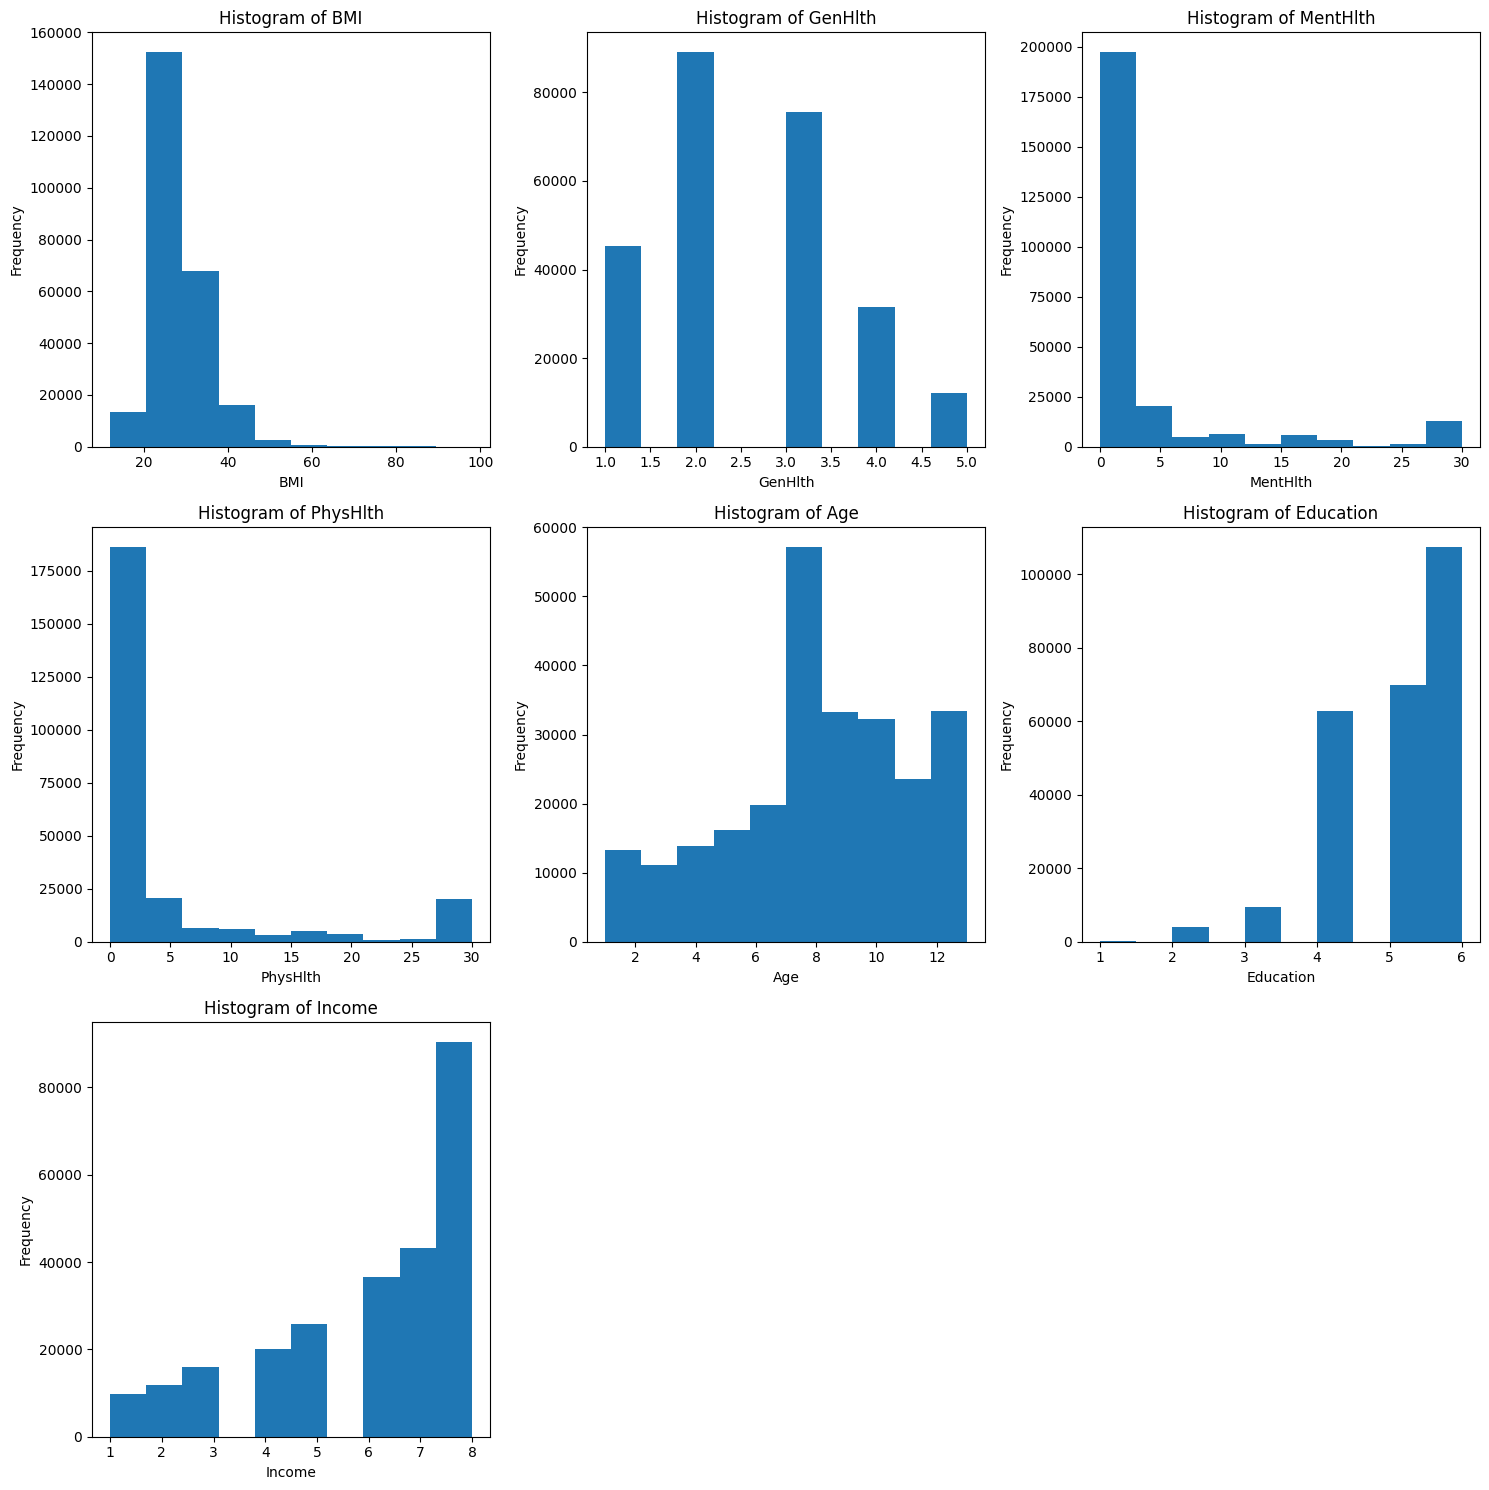

In [23]:
tdf = df[['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']]
num_cols = len(tdf.columns)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows)) # Adjust figsize as needed

for i, col in enumerate(tdf.columns):
    row = i // 3
    col_idx = i % 3
    axes[row, col_idx].hist(tdf[col])
    axes[row, col_idx].set_title(f'Histogram of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(num_cols, num_rows * 3):
    row = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [27]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [33]:
columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
for col in columns:
  print(df[col].groupby(df[col]).count())
  print()

HighBP
0.0    144851
1.0    108829
Name: HighBP, dtype: int64

HighChol
0.0    146089
1.0    107591
Name: HighChol, dtype: int64

CholCheck
0.0      9470
1.0    244210
Name: CholCheck, dtype: int64

Smoker
0.0    141257
1.0    112423
Name: Smoker, dtype: int64

Stroke
0.0    243388
1.0     10292
Name: Stroke, dtype: int64

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

PhysActivity
0.0     61760
1.0    191920
Name: PhysActivity, dtype: int64

Fruits
0.0     92782
1.0    160898
Name: Fruits, dtype: int64

Veggies
0.0     47839
1.0    205841
Name: Veggies, dtype: int64

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64

AnyHealthcare
0.0     12417
1.0    241263
Name: AnyHealthcare, dtype: int64

NoDocbcCost
0.0    232326
1.0     21354
Name: NoDocbcCost, dtype: int64

DiffWalk
0.0    211005
1.0     42675
Name: DiffWalk, dtype: int64

Sex
0.0    141974
1.0    111706
Name: Sex, dtype: int64



In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

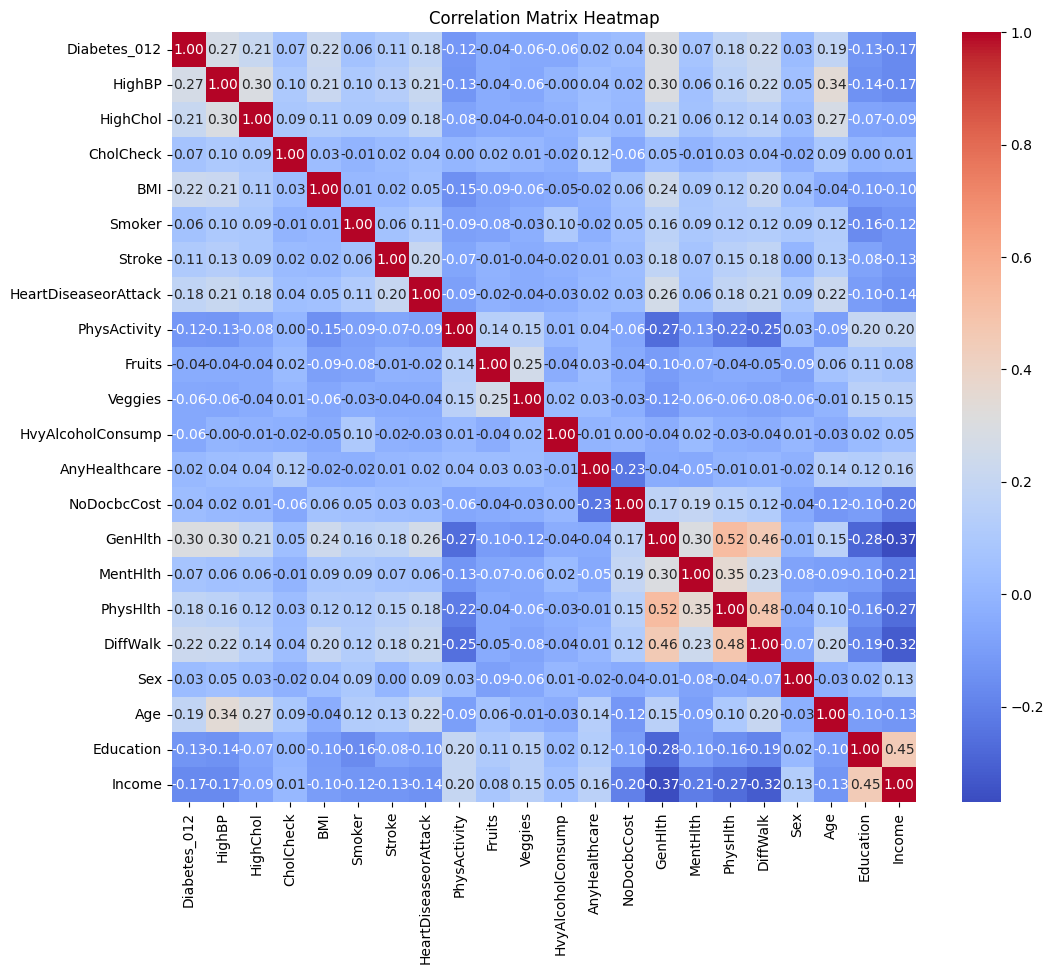

In [35]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

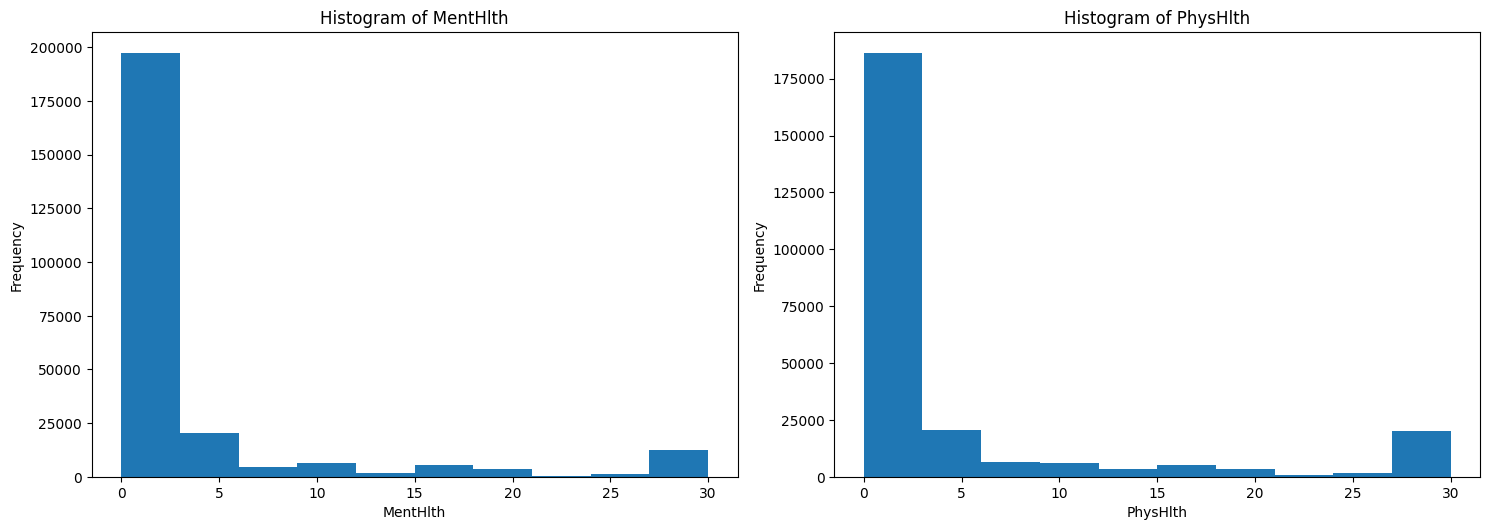

In [37]:
tdf = df[['MentHlth','PhysHlth']]
num_cols = len(tdf.columns)
num_rows = (num_cols + 2) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows)) # Adjust figsize as needed

for i, col in enumerate(tdf.columns):
    row = i // 2
    col_idx = i % 2
    axes[row, col_idx].hist(tdf[col])
    axes[row, col_idx].set_title(f'Histogram of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(num_cols, num_rows * 2):
    row = i // 2
    col_idx = i % 2
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [44]:
tdf[col].sort_values()

,PhysHlth
126839,0.0
149112,0.0
149113,0.0
149116,0.0
149118,0.0
...,...
151277,30.0
16517,30.0
151283,30.0
227178,30.0


In [46]:
tdf[col].value_counts(normalize=True).sort_index().cumsum()

,proportion
PhysHlth,
0.0,0.630921
1.0,0.675812
2.0,0.734011
3.0,0.767498
4.0,0.785403
5.0,0.815449
6.0,0.820691
7.0,0.838580
8.0,0.841769


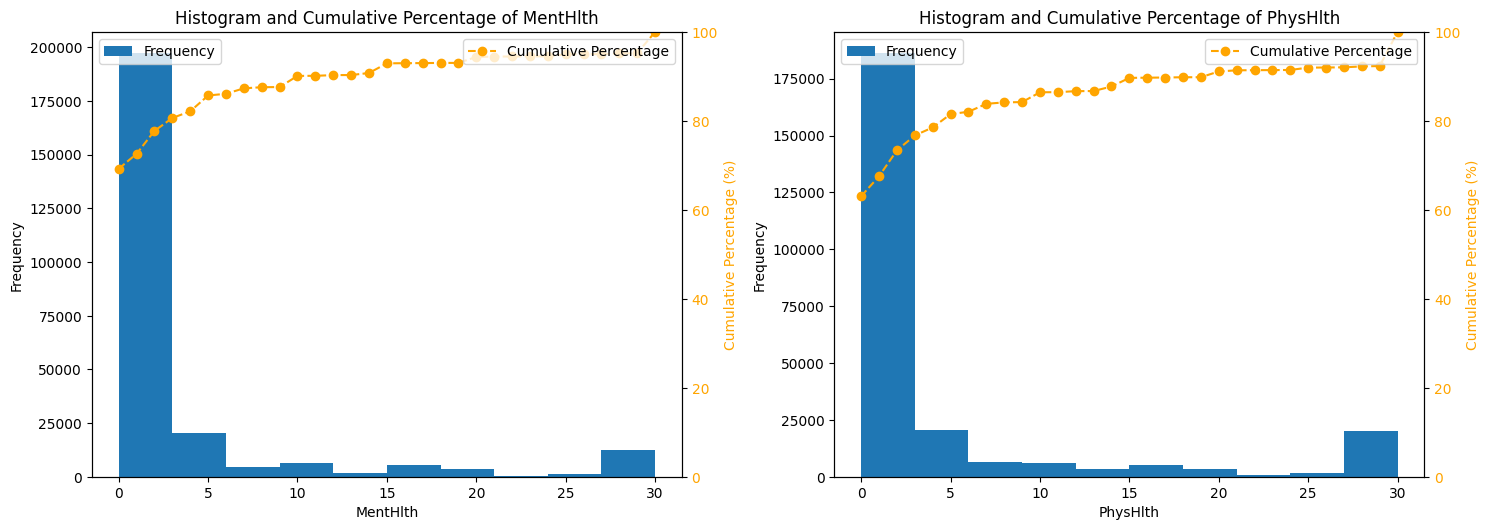

In [53]:
# prompt: generate hist graph on the primary axis and cumulative graph based on percentage of total on second axis

import matplotlib.pyplot as plt

# Assuming 'tdf' and its columns are defined as in your provided code
# Example:
tdf = df[['MentHlth','PhysHlth']]

num_cols = len(tdf.columns)
num_rows = (num_cols + 2) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows)) # Adjust figsize as needed

for i, col in enumerate(tdf.columns):
    row = i // 2
    col_idx = i % 2

    # Primary axis: Histogram
    axes[row, col_idx].hist(tdf[col], label='Frequency')

    # Secondary axis: Cumulative percentage
    ax2 = axes[row, col_idx].twinx()  # Create a twin axis sharing the same x-axis
    cumulative_percentage = tdf[col].value_counts(normalize=True).sort_index().cumsum() * 100
    ax2.plot(cumulative_percentage.index, cumulative_percentage.values, color='orange', marker='o', linestyle='--', label='Cumulative Percentage')
    ax2.set_ylabel('Cumulative Percentage (%)', color='orange')  # Set color for secondary y-axis label
    ax2.tick_params(axis='y', labelcolor='orange')  # Set color for secondary y-axis ticks
    ax2.set_ylim([0, 100])

    axes[row, col_idx].set_title(f'Histogram and Cumulative Percentage of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].legend(loc='upper left')
    ax2.legend(loc='upper right')

# Hide any unused subplots
for i in range(num_cols, num_rows * 2):
    row = i // 2
    col_idx = i % 2
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

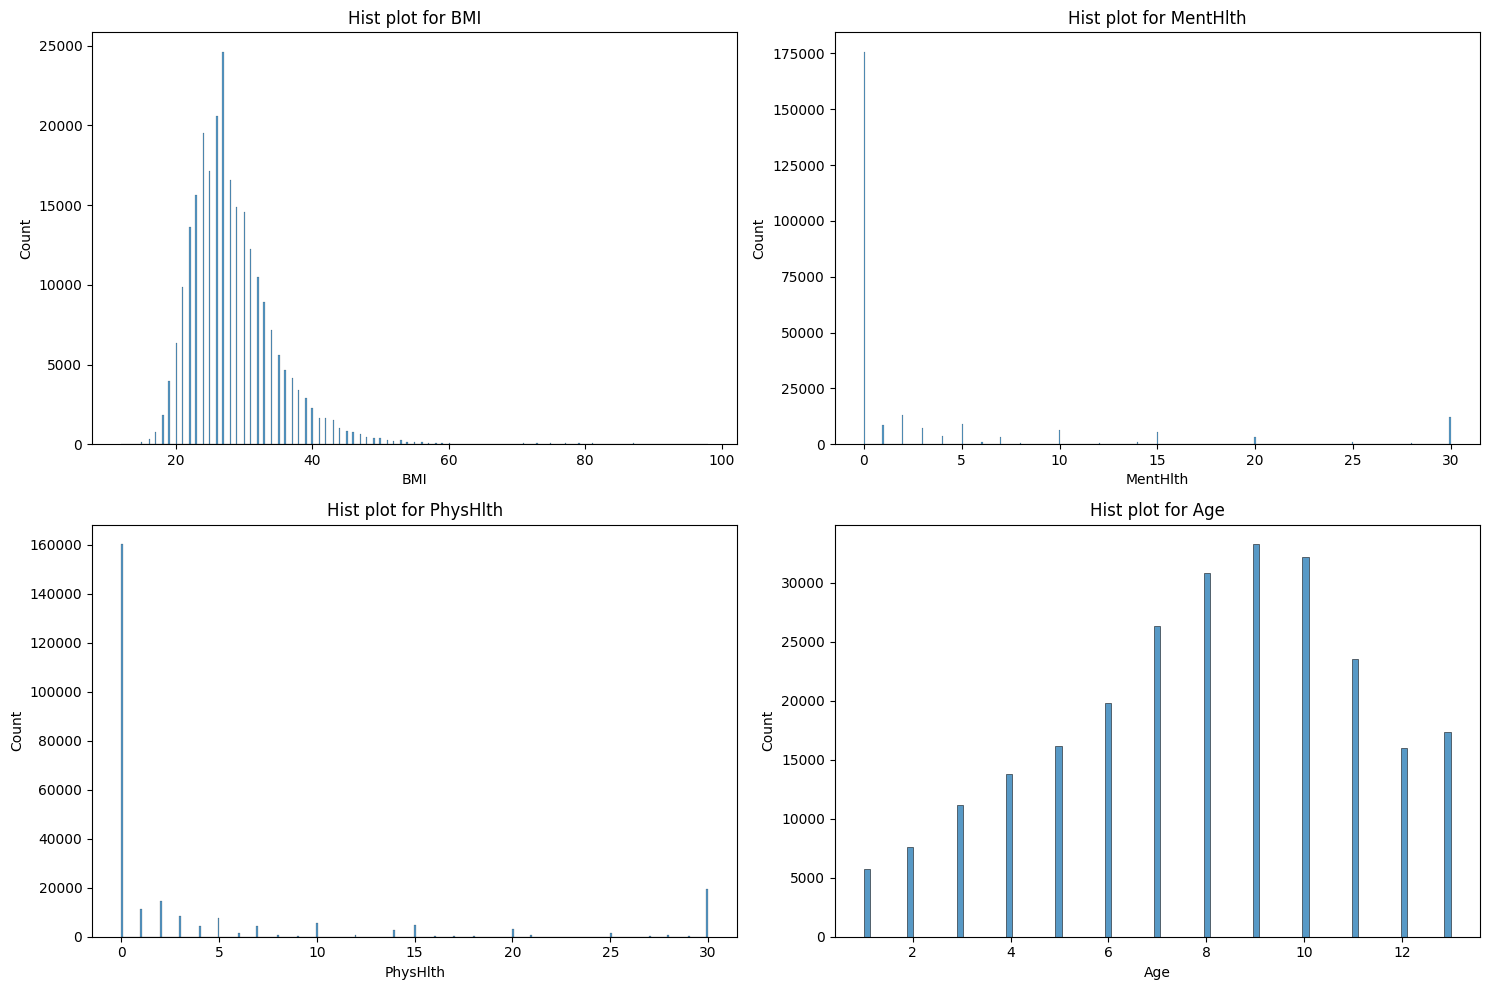

In [63]:
tdf = df[['BMI','MentHlth','PhysHlth','Age']]

num_rows, num_cols = 2, 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(tdf.columns):
    sns.histplot(data=tdf, x=column, ax=axes[i])
    axes[i].set_title(f'Hist plot for {column}')

# Remove any remaining empty subplots
for j in range(len(tdf.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


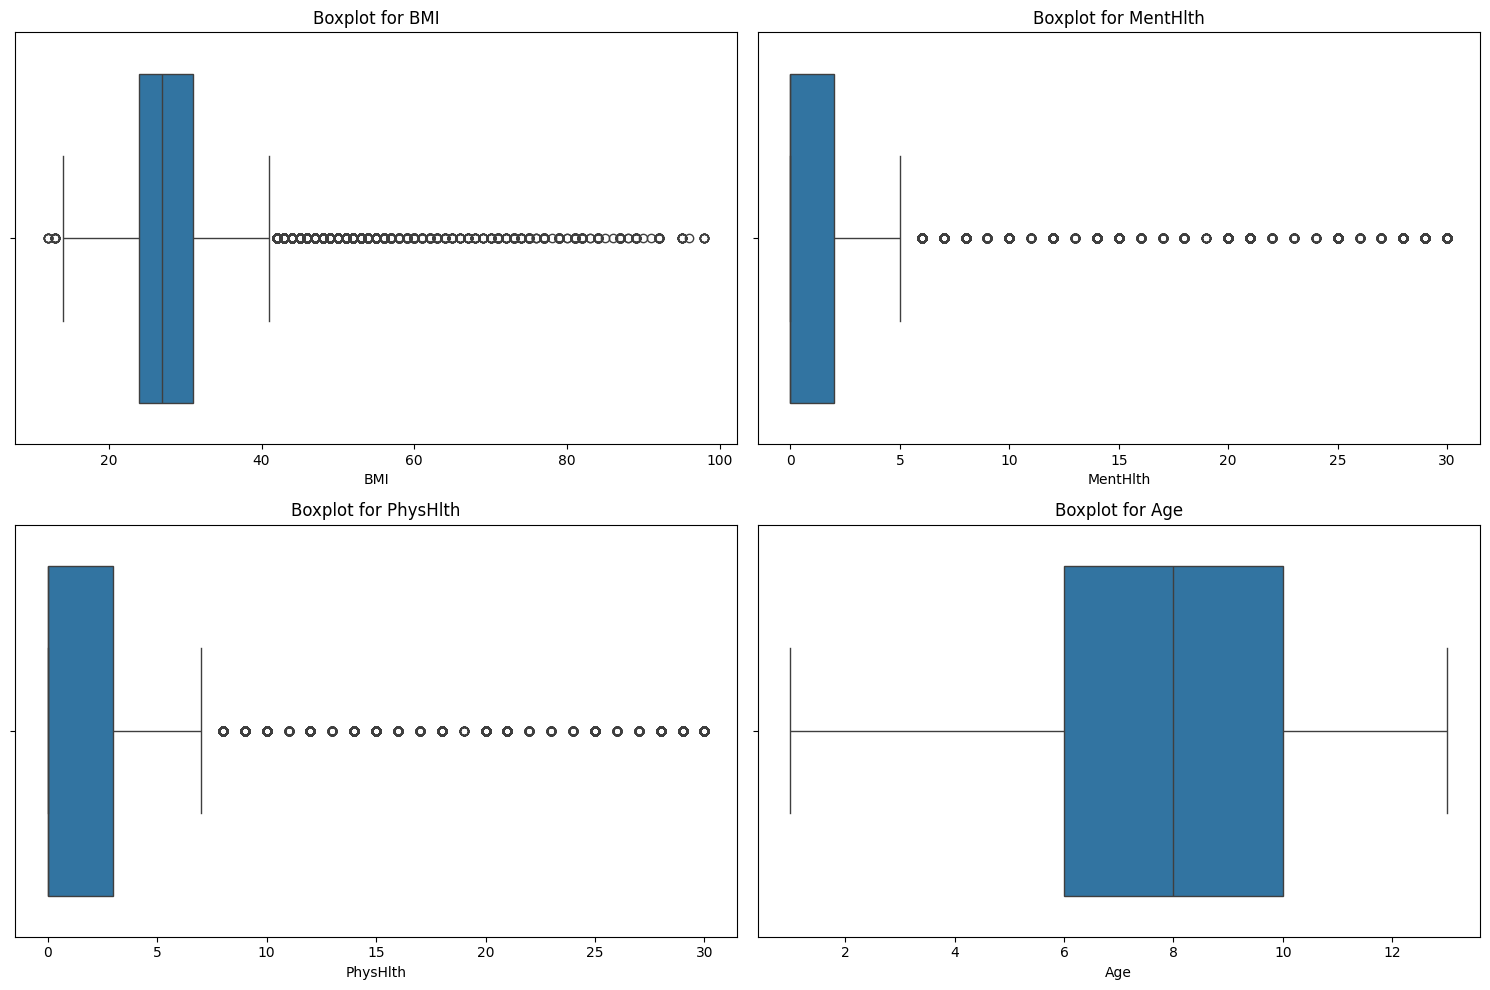

In [57]:
tdf = df[['BMI','MentHlth','PhysHlth','Age']]

num_rows, num_cols = 2, 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(tdf.columns):
    sns.boxplot(data=tdf, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Remove any remaining empty subplots
for j in range(len(tdf.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [64]:
numeric_columns = ['BMI','MentHlth','PhysHlth']

for column_name in numeric_columns:
    Q1 = np.percentile(df[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation='midpoint')

    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Find outliers in the specified column
    outliers = df[(df[column_name] < low_lim) | (df[column_name] > up_lim)][column_name]

    # Replace outliers with the respective lower or upper limit
    df[column_name] = np.where(df[column_name] < low_lim, low_lim, df[column_name])
    df[column_name] = np.where(df[column_name] > up_lim, up_lim, df[column_name])

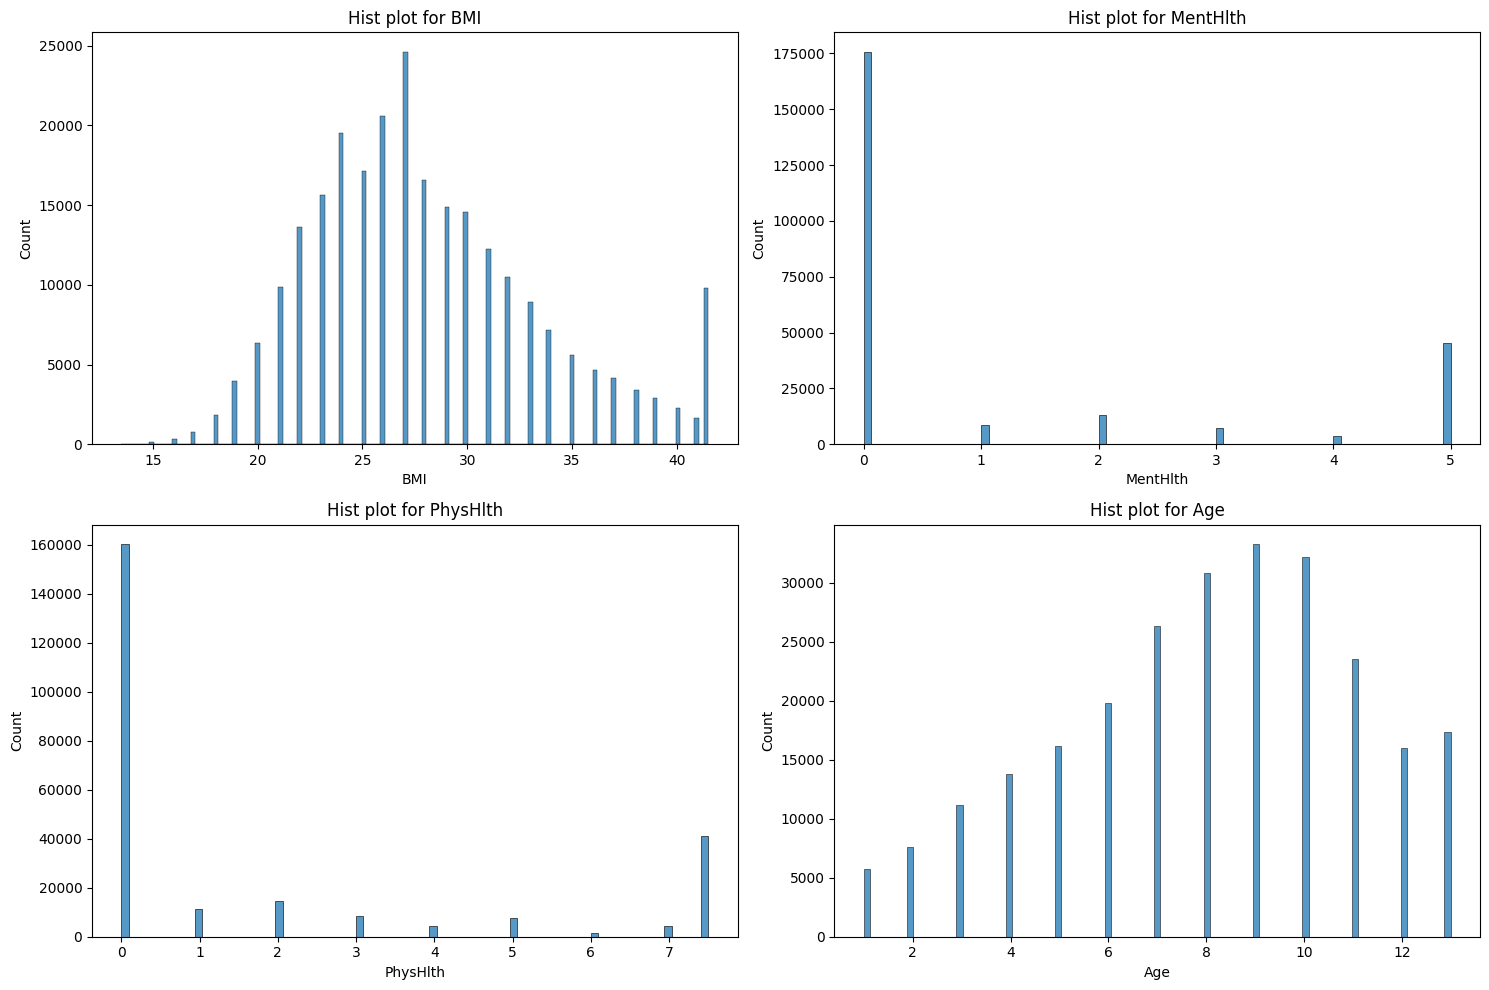

In [65]:
tdf = df[['BMI','MentHlth','PhysHlth','Age']]

num_rows, num_cols = 2, 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(tdf.columns):
    sns.histplot(data=tdf, x=column, ax=axes[i])
    axes[i].set_title(f'Hist plot for {column}')

# Remove any remaining empty subplots
for j in range(len(tdf.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


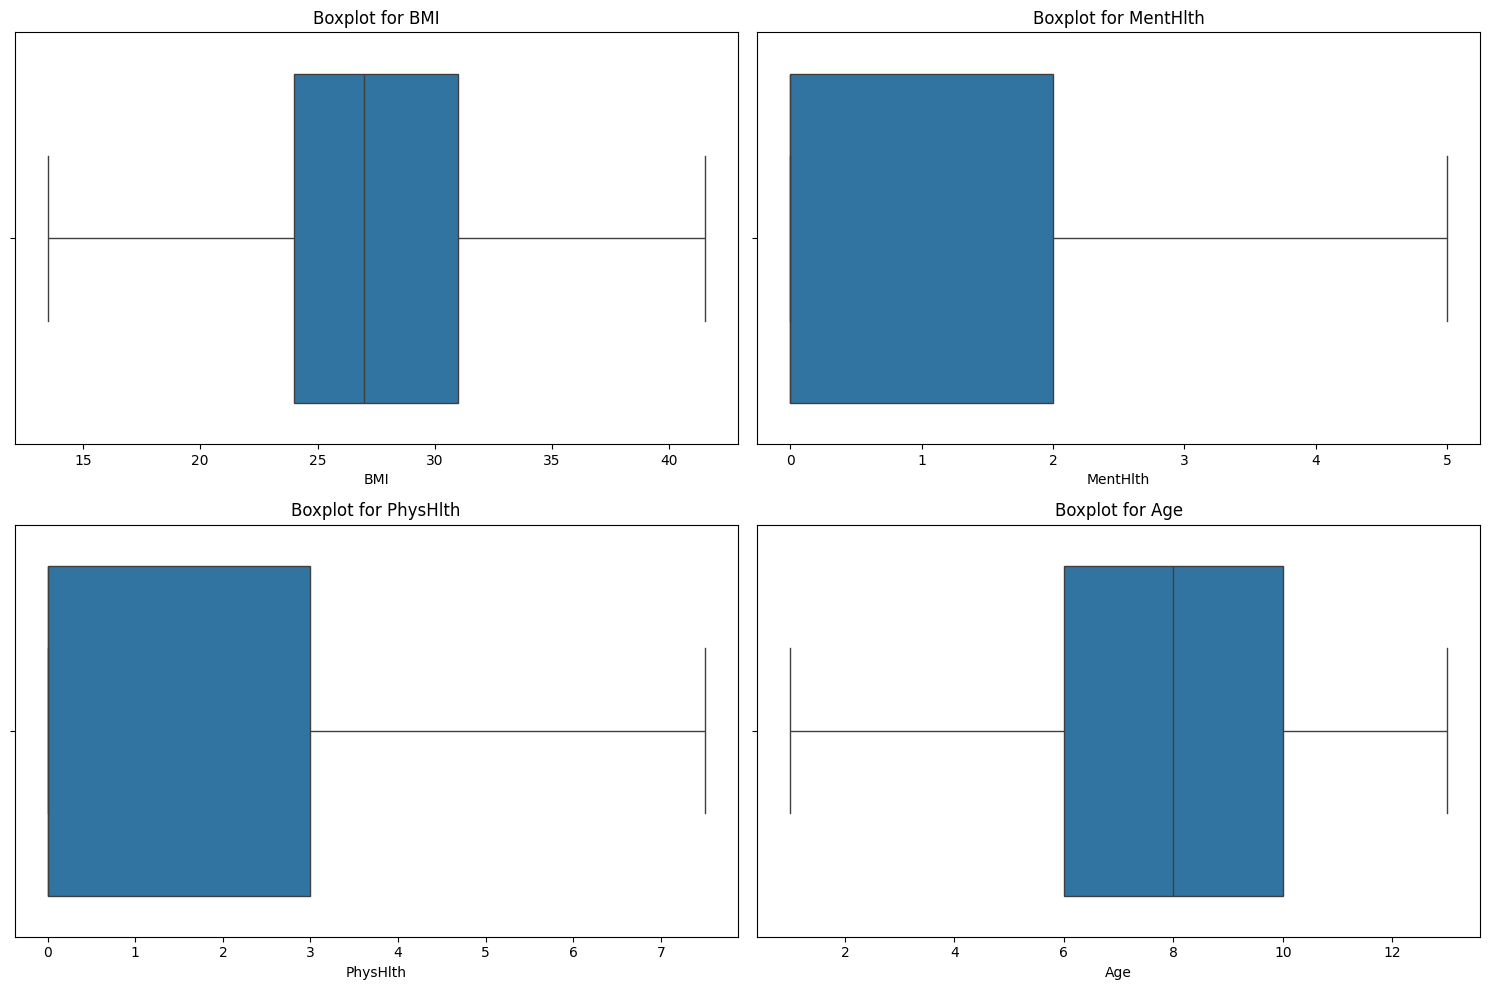

In [66]:
tdf = df[['BMI','MentHlth','PhysHlth','Age']]

num_rows, num_cols = 2, 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(tdf.columns):
    sns.boxplot(data=tdf, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Remove any remaining empty subplots
for j in range(len(tdf.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


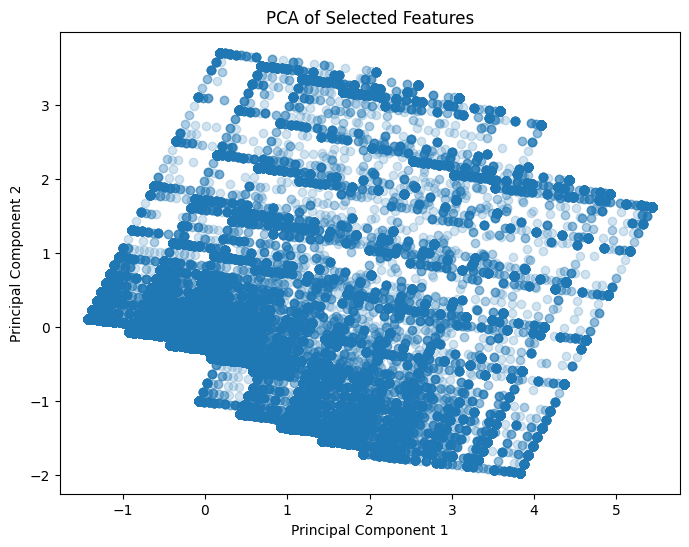

Explained Variance Ratio:
[0.54897925 0.19903846]
Total Explained Variance: 0.7480177069868356


In [9]:
# prompt: pca analysis of df

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numerical features for PCA
features_for_pca = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
features_for_pca = ['GenHlth','MentHlth', 'PhysHlth', 'DiffWalk']
X_pca = df[features_for_pca]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca_transformed = pca.fit_transform(X_scaled)

# Create a scatter plot of the principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Selected Features")
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio:\n{explained_variance_ratio}")
print(f"Total Explained Variance: {sum(explained_variance_ratio)}")

In [5]:
X_pca_transformed

array([[ 2.2857869 ],
       [-0.6478668 ],
       [ 4.64710325],
       ...,
       [-0.6478668 ],
       [-0.6478668 ],
       [-0.6478668 ]])

Downsampling

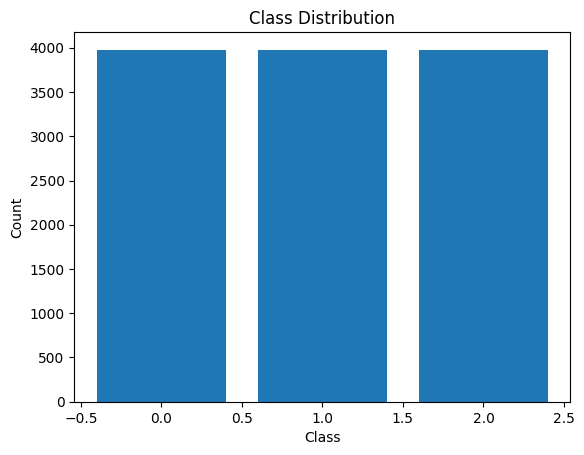

In [ ]:

# extract last 15% of original dataset as test dataset
test_start_index = len(df) // 100 * 85
train_df = df.iloc[:test_start_index]
test_df = df.iloc[test_start_index + 1:]

min_class_count = train_df['Diabetes_012'].value_counts().min()
class_groups = [train_df[train_df['Diabetes_012'] == c] for c in train_df['Diabetes_012'].unique()]
downsampled_classes = [group.sample(n=min_class_count, random_state=42)
                        for group in class_groups]

train_df = pd.concat(downsampled_classes)

train_features = train_df.drop(columns=["Diabetes_012"])
train_labels = train_df["Diabetes_012"]

test_features = test_df.drop(columns=["Diabetes_012"])
test_labels = test_df["Diabetes_012"]

import matplotlib.pyplot as plt
import pandas as pd

count_class = train_labels.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
#normalization needed due to data skew
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# data (as pandas dataframes)
X_train, X_val, y_train, y_val = train_test_split(
    train_features, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

class DiabetesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features.values, dtype=torch.float32).to(device)  # Convert to tensor
        self.targets = torch.tensor(targets.values, dtype=torch.long).to(device)       # Convert to tensor for classification

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Create Dataset
train_dataset = DiabetesDataset(X_train, y_train)
val_dataset = DiabetesDataset(X_val, y_val)
test_dataset = DiabetesDataset(test_features, test_labels)

Model code starting here

Use `train_dataset`, `val_dataset`, `test_dataset` as the input dataset

Train Dataset has

| Class | Count |
| --- | --- |
| 0.0 | 3978|
| 2.0 | 3978|
| 1.0 | 3978|

Test Dataset has

| Class | Count |
| --- | --- |
| 0.0 | 32427|
| 2.0 | 5039|
| 1.0 | 653|

Example below: